In [ ]:
#pip install seaborn_image

In [ ]:
#pip install mlxtend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics
from scipy.stats import mode


# Clustering

## Exercise 1: k-means on digits

Use K-means clustering on the MNIST dataset (which can be imported with `from sklearn.datasets import load_digits`) to learn to identify the 10 digits in an unsupervised manner.

1. Plot the `cluster_centers_` (which should be shape `(10,64)`) onto a `8x8` grid (hint: use `kmeans.cluster_centers_.reshape`)
2. Reorganize the clusters so that each of your learned clusters labels overlap with the true label (eg. if the digit 4 has the cluster label 9, you want to remap it to 4). Hint: You can use the statistical mode of your clusters and the real label to match them
3. Now that your cluster labels are matched to the supervised learning labels, check the classification accuracy of your clustering model (accuracy score and confusion matrix). Give a two paragraph interpretation.
4. Use the Fowlkes-Mallows score to evaluate your clustering against the true labels. Give a two paragraph interpretation comparing to your result in #3.

In [3]:
# exercise 1
digits = load_digits(as_frame=True)#loading data(MNIST) from sklearn package
print(digits.data.shape)


(1797, 64)


In [51]:
#print(digits.DESCR)

In [52]:
labels = digits.target_names#the target value should be predeted

In [53]:
#digits.feature_names#showing a matrix 8X8

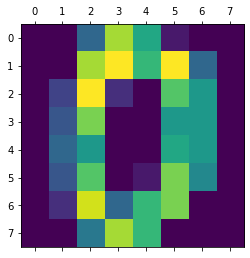

In [54]:
x = digits.data#each raw present one image(64pixels)
y = digits.target
image = np.array(x.iloc[0]).reshape(8,8)#reshaped for having the first image
plt.matshow(image)

In [55]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [56]:
n_clusters = 10
km = KMeans(n_clusters, random_state=101)
km.fit(x)
ypred = km.predict(x)


C:\Users\zmaso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


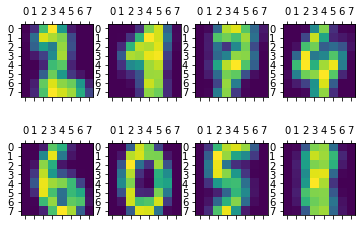

In [57]:
centers = []
for i in range(x[:8].shape[0]):#plotting just for 8 digits
    center = km.cluster_centers_[i]
    center = center.reshape(8, 8)
    centers.append(center)
    
fig, axs = plt.subplots(nrows=2, ncols=4)
for i, ax in enumerate(axs.flat):
        ax.matshow(centers[i])
        

In [58]:
#evaluation of clustering:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, ypred))#how much could algorithm cluster the similar data in each samples 
print("Completeness: %0.3f" % metrics.completeness_score(y, ypred))#how much similarity is there among samples in each cluster after clustering
print("V-measure: %0.3f" % metrics.v_measure_score(y, ypred))#goodness of clustering
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, ypred))# computes a similarity measure between two clusterings by considering all pairs of samples 
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, ypred))#compute the similarity by comparing two clusters how many similar data have in common
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, ypred))#cohesion of clusters, some how they are separate[-1, 1]
print("Accuracy: %0.3f"
      % metrics.accuracy_score(y, ypred))#accuracy is too low, so our model does not work well
print("fowlkes_mallows_score: %0.3f"
      % fowlkes_mallows_score(y, ypred))#Measure the similarity of clusters 

Homogeneity: 0.741
Completeness: 0.749
V-measure: 0.745
Adjusted Rand Index: 0.670
Adjusted Mutual Information: 0.743
Silhouette Coefficient: 0.181
Accuracy: 0.112
fowlkes_mallows_score: 0.704


In [59]:
print(metrics.confusion_matrix(y, ypred))
#from confusion matrix could be seen the principle diameter has not the mode of the number
#it needs to be improved.  as we can see the classification report also approve our assertion.

[[  0   0   0   1   0 177   0   0   0   0]
 [ 24  55   0   0   2   0   1  99   1   0]
 [148   2   3   0   0   1   0   8  13   2]
 [  0   0   7   0   0   0   2   7 155  12]
 [  0   3   9 166   0   0   0   3   0   0]
 [  0   0   0   2   1   0 136   0   1  42]
 [  0   1   0   0 177   1   0   2   0   0]
 [  0   2 174   0   0   0   1   2   0   0]
 [  3   6   4   0   2   0   5 102   2  50]
 [  0  20   7   0   0   0   6   2   6 139]]


In [60]:
print(metrics.classification_report(y, ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       178
           1       0.62      0.30      0.41       182
           2       0.01      0.02      0.02       177
           3       0.00      0.00      0.00       183
           4       0.00      0.00      0.00       181
           5       0.00      0.00      0.00       182
           6       0.00      0.00      0.00       181
           7       0.01      0.01      0.01       179
           8       0.01      0.01      0.01       174
           9       0.57      0.77      0.65       180

    accuracy                           0.11      1797
   macro avg       0.12      0.11      0.11      1797
weighted avg       0.12      0.11      0.11      1797



In [61]:
#this cross_table clearly shows the mode of the each columns corresponding to what y_targe as true value
#so we try to change the label for ypred according to correct labeling of some ypred labeled by
#mistake through mode of every single cluster
#I used the idea of crosstab from Nelson's coding uploaded on github.
#with statistics(mode), I could not work, so i used cross tab to find the mode.
predictions = ypred
true_value = y
compliance = pd.crosstab(predictions, true_value)
compliance

target,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,0,24,148,0,0,0,0,0,3,0
1,0,55,2,0,3,0,1,2,6,20
2,0,0,3,7,9,0,0,174,4,7
3,1,0,0,0,166,2,0,0,0,0
4,0,2,0,0,0,1,177,0,2,0
5,177,0,1,0,0,0,1,0,0,0
6,0,1,0,2,0,136,0,1,5,6
7,0,99,8,7,3,0,2,2,102,2
8,0,1,13,155,0,1,0,0,2,6


In [62]:
corrected_ypred = pd.Series(ypred).map({0:2, 1:1, 2:7, 3:4, 4:6, 5:0, 6:5, 7:8, 8:3, 9:9})


In [63]:
#as we can see, the algorithm has the accurate clustering, however label=1 could not be clustered well
print(metrics.confusion_matrix(y, corrected_ypred))

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 155   0   2   0   7   7  12]
 [  0   3   0   0 166   0   0   9   3   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   1   0 174   2   0]
 [  0   6   3   2   0   5   2   4 102  50]
 [  0  20   0   6   0   6   0   7   2 139]]


In [64]:
print(metrics.classification_report(y, corrected_ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.62      0.30      0.41       182
           2       0.85      0.84      0.84       177
           3       0.87      0.85      0.86       183
           4       0.98      0.92      0.95       181
           5       0.90      0.75      0.82       182
           6       0.97      0.98      0.98       181
           7       0.85      0.97      0.91       179
           8       0.45      0.59      0.51       174
           9       0.57      0.77      0.65       180

    accuracy                           0.80      1797
   macro avg       0.81      0.80      0.79      1797
weighted avg       0.81      0.80      0.79      1797



In [65]:
#with relabeling, all scores have been improved well.
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, corrected_ypred))
print("Completeness: %0.3f" % metrics.completeness_score(y, corrected_ypred))
print("V-measure: %0.3f" % metrics.v_measure_score(y, corrected_ypred))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, corrected_ypred))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, corrected_ypred))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, corrected_ypred))
print("Accuracy: %0.3f"
      % metrics.accuracy_score(y, corrected_ypred))
print("fowlkes_mallows_score: %0.3f"
      % fowlkes_mallows_score(y, corrected_ypred))

Homogeneity: 0.741
Completeness: 0.749
V-measure: 0.745
Adjusted Rand Index: 0.670
Adjusted Mutual Information: 0.743
Silhouette Coefficient: 0.181
Accuracy: 0.795
fowlkes_mallows_score: 0.704


       After correcting the labels the result of the scores except the accuracy, all are the same.
       all, these scores evaluate the clustering performance with diffrent approaches, though our correction has not
       affected the clustering performance, that's why there is no difference between scores. the silhouette
       score is low becuase it could not recognize some blurred pictures. it means there is overlapping on
       clustering, therefore algorithm just labeled them as the similarity result.
       For the accuracy score, there is a huge difference after and before reorganizing the labels. 
       Because  accuracy works whether the label is correct or not without any supervising the algorithm and
       clustering performance. so it is clear after correction, comparing predictions and true value, predictions
       is better than before.          
       after correction the results still are not so close to 1 as a perfect clustering, because of some 
       blurred images of hand-writing like 5, 8, and 1 which is not clear to distinguish the numbers.

## Exercise 2: Image Compression second pass

Use any the clustering algorithms we see to produce what you think is the best image compression ratio that is **visually indistinguishable** from the original image (recall in the lecture the result was very compressed but also much uglier)

Justify your choice and process in 3 paragraphs.

(427, 640, 3)

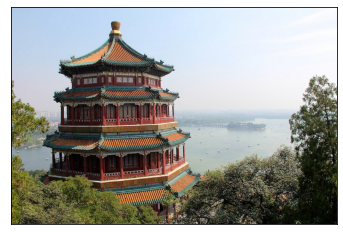

In [19]:
# exercise 2
# Note: this requires the pillow package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);
china.shape

In [20]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [21]:
# def plot_pixels(data, title, colors=None, N=10000):
#     if colors is None:
#         colors = data
    
#     # choose a random subset
#     rng = np.random.RandomState(0)
#     i = rng.permutation(data.shape[0])[:N]
#     colors = colors[i]
#     R, G, B = data[i].T
    
#     fig, ax = plt.subplots(1, 2, figsize=(16, 6))
#     ax[0].scatter(R, G, color=colors, marker='.')
#     ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

#     ax[1].scatter(R, B, color=colors, marker='.')
#     ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

#     fig.suptitle(title, size=20);
# plot_pixels(data, title='Input color space: 16 million possible colors')

In [22]:
#to make clustering in different clusters' numbers to see what number could have the better tradeoff
images = []
for n_cluster in [16, 32, 64, 128 ]:
    kmeans = KMeans(n_cluster)
    kmeans.fit(data)
    labels_predicted = kmeans.predict(data)
    decreased_shades = kmeans.cluster_centers_[(labels_predicted)].reshape(china.shape)
    images.append(decreased_shades)


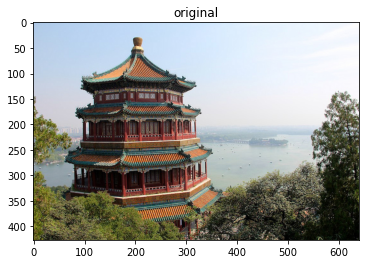

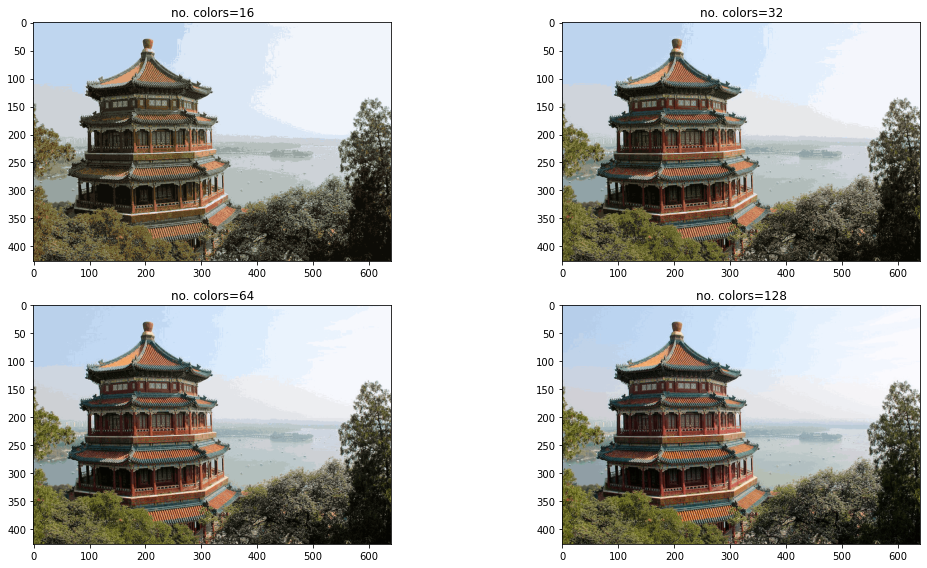

In [23]:
plt.imshow(china)
plt.title('original')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))

ax1.imshow(images[0])
ax1.set_title('no. colors=16')
ax2.imshow(images[1])
ax2.set_title('no. colors=32')
ax3.imshow(images[2])
ax3.set_title('no. colors=64')
ax4.imshow(images[3])
ax4.set_title('no. colors=128')
plt.tight_layout()


      kmeans' approach has been chosen with different clusters' numbers(8, 32, 64, 128) 
      which are the number of unique pigments used in image. RGB as the color visuality of original picture 
      is the 256X3. therefore, 128 for each block of principle colors could be the best choice for tradoff
      between the clearity, computation and memory efficiency. overall, we have not lost too much details in 
      the compacted picture.
      
      we lost some details in the vast colored area like sky or sea which is not important in image anlysis.
      the objects like trees, boat and building still have thier own details and still could have been efficient
      in analysis. 128 clusters centeroides could make optimum image presentation.As it could be seen,
      there is close semilairaty between the original image and compressed one in 128 colors.
      depends on which object is the target, even no.color=64 still is a good choice.

      

## Exercise 3: Clustering on Colleges

This question will use the data from `college.csv`

1. Use clustering with `k=2` on all data except whether the college is private of not. Try to match it best to the private/public college split (hint: don't forget to normalize your features!). Evaluate it in terms of classification metrics and clustering metrics.

2. Knowing what you found in `3.1`, find the best overall clustering with the k of your choice. Make an argument and a visualization of the clusters (with two relevant statistics) to demonstrate why you think your clustering is good.

In [24]:
# exercise 3
df = pd.read_csv('../data/college.csv')#colleg data with evaluating the college's type as private or public
df.head(3)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [25]:
#df.info

In [26]:
scaler = MinMaxScaler()#scaling before modeling
df1 = scaler.fit_transform(df.iloc[:, 2:])
df1 = pd.DataFrame(df1, columns=df.iloc[:, 2:].columns)

In [27]:
xc = df1#predictors
yc= pd.get_dummies(df.iloc[:, 1], drop_first=True, columns='private')#target value


In [28]:
n_cluster = 3#number of centroides
kmean = KMeans(n_cluster, random_state=1)#kmean clustering
kmean.fit(xc)
ycpred = kmean.fit_predict(xc)#predicted target value

C:\Users\zmaso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\zmaso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [32]:
clusters= pd.Series(ycpred)
predicted = pd.Series(clusters).map({0:'public',1:'private'})
labels = pd.Series(df.iloc[:,1]).map({'No':'public','Yes':'private'})

In [33]:
s = metrics.silhouette_score(xc, kmean.labels_, metric='euclidean')
#rand_score = metrics.adjusted_rand_score(labels, predicted)
# mutual_info = metrics.adjusted_mutual_info_score(labels, predicted)
#print(f"silhouette_score:{s}\nadjusted_rand_score:{rand_score}\nmutual_info:{mutual_info}")
print(f"silhouette_score:{s}")

silhouette_score:0.2601754959700096


In [34]:
metrics.confusion_matrix(yc, ycpred)#after having supervised data, it could be possible to have accuracy table

array([[115,  84,  13],
       [  9, 306, 250],
       [  0,   0,   0]], dtype=int64)

In [35]:
print(metrics.classification_report(yc, ycpred))

              precision    recall  f1-score   support

           0       0.93      0.54      0.68       212
           1       0.78      0.54      0.64       565
           2       0.00      0.00      0.00         0

    accuracy                           0.54       777
   macro avg       0.57      0.36      0.44       777
weighted avg       0.82      0.54      0.65       777



C:\Users\zmaso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zmaso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zmaso\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\zmaso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\zmaso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\zmaso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\zmaso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

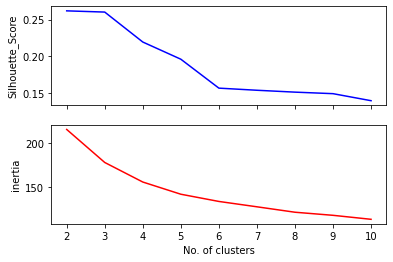

In [36]:
#to plot the silhouette and elbow plots
sc =[]
ssc = []
for n_cluster in range(2, 11):
    kmean = KMeans(n_cluster, random_state=1)
    kmean.fit(xc)
    ycpred = kmean.fit_predict(xc)
    sc.append(metrics.silhouette_score(xc, kmean.labels_, metric='euclidean'))
    #Inertia measures how well a dataset was clustered by K-Means 
    #It is calculated by measuring the distance between each 
    #data point and its centroid, squaring this distance,
    #and summing these squares across one cluster.
    ssc.append(kmean.inertia_)#for elbow plot
    
    
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(range(2,11),sc, color='blue')
ax2.plot(range(2,11),ssc, color='red')
ax2.set_xlabel('No. of clusters')
ax1.set_ylabel('Silhouette_Score')
ax2.set_ylabel('inertia')
# # plt.title('Silhoutte Analysis')
plt.show()

      as seen in figures plotted above the optimum cluster happend in n_cluster=  3 also the classification
      report and confusion matrix show the better result than n_cluster=2, however we have 2 predictions as
      yes or no in target value.

In [37]:
#to find the best feature to choose for visualization
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(df1,yc)
college = pd.DataFrame(fit.scores_)
best_feature= pd.DataFrame(df1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([best_feature,college],axis=1)
featureScores.columns = ['features','Score']  #re-naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))

       features      Score
5   F.Undergrad  61.664567
2        Enroll  45.626881
7      Outstate  24.459033
1        Accept  20.599307
6   P.Undergrad  19.706979
0          Apps  15.475695
14  perc.alumni  14.083511
8    Room.Board   6.618876
13    S.F.Ratio   6.271471
10     Personal   4.616779


In [31]:
#two best features chosen above transformed to squared data to improe ttest result
poly = PolynomialFeatures(degree=2)
df.undergard = poly.fit_transform(df[['F.Undergrad']])
df.apps = poly.fit_transform(df[['Apps']])
stats.ttest_ind(df.undergard[:,1], df.apps[:,1])#the squared data has the better Pvalue less than 0.05 
# it is clear two samples has the statistically significant different in mean value. 
#so we can consider them as the effective predictors

Ttest_indResult(statistic=3.1367107891825743, pvalue=0.001740625502020997)

Text(0, 0.5, 'Applications number as Apps')

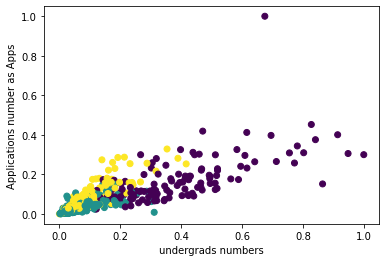

In [30]:
plt.scatter(df1['F.Undergrad'], df1.Apps, c=ycpred)
plt.xlabel('undergrads numbers')#it is wierd because i could not able to do the simple x labeling!!!1
plt.ylabel('Applications number as Apps')